#### Importing and constant defining section:


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
# to set current working directory coherent_neutrino_scattering/ (not coherent_neutrino_scattering/vis/)
if os.getcwd()[-4:] == '/vis':
    os.chdir('../')
%matplotlib inline

from lib.config import config
import lib.coherent_neutrino_nucleus as cn
import lib.phys_constants as phys
from lib.supernova import single_neutrino_flux


################################# Detector ##########################################################
DISTANCE = 50 # m ()
Ar_MOLAR_MASS = 38.964313 / 1000 # kg/mol
Ar_M = 38.964313 * phys.ATOMIC_MASS_UNIT # MeV
Ar_N = 21
Ar_Z = 18
DETECTOR_MASS = 20 * 1000 # kg
NUMBER_TARGETS = phys.AVOGADRO * DETECTOR_MASS / Ar_MOLAR_MASS

### Sample Reactor Antineutrino Flux and Spectrum

Need to add some info

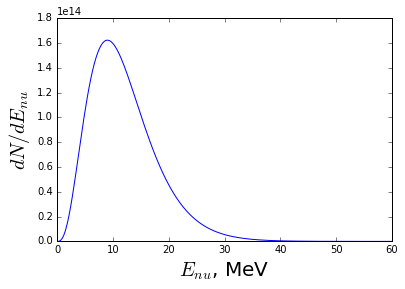

In [5]:
nu_energy_range = np.linspace(0, 60, 200) #MeV
supernova_spectrum = single_neutrino_flux(nu_energy_range)

plt.plot(nu_energy_range, supernova_spectrum)

plt.xlabel('$E_{nu}$, MeV', fontsize=20)
plt.ylabel('$ dN/dE_{nu} $', fontsize=20)

### Kinetic energy spectrum of recoil nuclei

$$ \frac{dN}{dT} = \int dE_{\nu} \frac{dF_{\nu}}{dE_{\nu}} \frac{d\sigma(E_{\nu})}{dT} $$


Initial def:

In [24]:
nucleus_max_kinetic = cn.max_kinetic_recoil_nucleus(Ar_M, nu_energy_range[nu_energy_range.size - 1]) # MeV
nucleus_kinetic_range = np.linspace(0, nucleus_max_kinetic, 200)

Producing recoil nuclei spectrum (integration):

/home/krab/workdir/simulation/coherent_neutrino_scattering/lib/coherent_neutrino_nucleus.py:41: RuntimeWarning: invalid value encountered in double_scalars
  differential_cs = G_FERMI**2 / (4 * math.pi) * Q_weak**2 * nucleus_m * (1 - (nucleus_m * nucleus_kin) / (2 * nu_energy**2))


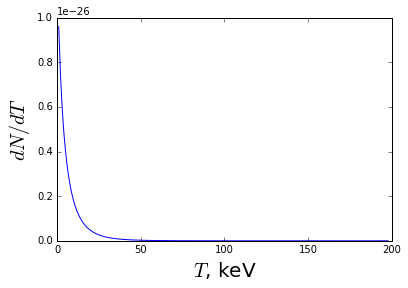

In [25]:
en_increment = nu_energy_range[1] - nu_energy_range[0]
nucleus_kinetic_spectrum = []

for nucleus_kinetic in nucleus_kinetic_range:
    #min nu energy to integrate
    min_nu_energy = cn.min_energy_neutrino_produce_recoil_nucleus(Ar_M, nucleus_kinetic) 
    #index in nu_energy_range
    first_index = np.argmax(nu_energy_range >= min_nu_energy)
    probability_density = 0
    
    for i in range(first_index, nu_energy_range.size):
        diff_cs = cn.differential_cross_section_for_nucleus_kinetic(Ar_Z, Ar_N, Ar_M, nu_energy_range[i], nucleus_kinetic)
        diff_cs *= phys.CONVERSION_hc**2 ## MeV^-2 ---> m^2
        probability_density += en_increment * supernova_spectrum[i] * diff_cs
        
    nucleus_kinetic_spectrum.append(probability_density)

nucleus_kinetic_spectrum = np.array(nucleus_kinetic_spectrum)

plt.plot(nucleus_kinetic_range*1000, nucleus_kinetic_spectrum)
plt.xlabel('$T}$, keV', fontsize=20)
plt.ylabel('$ dN/dT$', fontsize=20)

In [27]:
total_events = 0.
treashold = 0.5 / 1000 # MeV
delta_kin = nucleus_kinetic_range[1] - nucleus_kinetic_range[0]
for i in range(nucleus_kinetic_range.size):
    if nucleus_kinetic_range[i] < treashold:
        continue
    total_events += nucleus_kinetic_spectrum[i] * delta_kin
    
total_events * NUMBER_TARGETS

17.806883346524582